# **Heart Disease Prediction Model**

1. Early Detection:

* ML models can analyze a vast amount of patient data to identify patterns and subtle indicators that might go unnoticed by human practitioners.
* Early detection of heart disease can lead to timely intervention and improved treatment outcomes.
Reduced Healthcare Costs:

* Identifying potential heart issues at an early stage can prevent the progression of the disease, reducing the overall cost of treatment.
Preventive measures can be taken, and lifestyle changes can be recommended to mitigate the risk of heart disease, potentially lowering healthcare expenses.

2. Personalized Medicine:

* ML models can take into account various patient-specific factors such as genetics, lifestyle, and medical history to provide personalized risk assessments.
* This allows for targeted interventions and treatment plans tailored to individual patient needs.

3. Data-Driven Decision Making:

* ML models can process and analyze large datasets efficiently, aiding healthcare professionals in making informed decisions based on evidence and trends.
* Data-driven insights can enhance the accuracy of diagnoses and treatment plans.

4. Remote Monitoring:

* ML models can be integrated into remote monitoring systems, enabling continuous tracking of patients' health parameters.
This facilitates proactive healthcare management, especially for individuals at high risk or with pre-existing conditions.

5. Public Health Impact:

* Implementing heart disease detection models on a large scale can contribute to public health initiatives by identifying and addressing risk factors within specific populations.
Targeted public health interventions can be designed to reduce the overall incidence of heart disease.

6. Research and Innovation:

* The development of ML models for heart disease detection contributes to ongoing research in the field of cardiovascular health.
Insights gained from the models can lead to innovations in diagnostics, treatment protocols, and preventive measures.

7. Improved Patient Outcomes:

* Early detection and timely intervention can lead to better patient outcomes, including improved quality of life and increased survival rates.
* ML models can assist healthcare providers in optimizing treatment plans for better efficacy.

8. Public Awareness and Education:

* Deploying ML models for heart disease detection can raise public awareness about the risk factors associated with cardiovascular diseases.
Education and awareness campaigns can be developed based on the insights provided by the models.

# Data Import

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/ML case study/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
# Let's see the data first

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape

(1025, 14)

data set has 1025 rows and 14 attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Deep understanding of columns :

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 2 = fixed defect; 1 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 2 = fixed defect; 1 = reversable defect


Fix the null and duplicate values :

In [ ]:
# Find the null values
null_value=data.isnull().sum()
print(null_value)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Count the occurrences of duplicate rows based on all columns
duplicate_counts = data.duplicated().sum()
print(duplicate_counts)

723


723 duplicate rows are there in the data set

In [ ]:
# Remove duplicate rows based on all columns
df= data.drop_duplicates()

# Display the DataFrame without duplicates
print("DataFrame without duplicates:")
display(df)

DataFrame without duplicates:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Handling Outliers :

In [ ]:
print(df['age'].describe())

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64


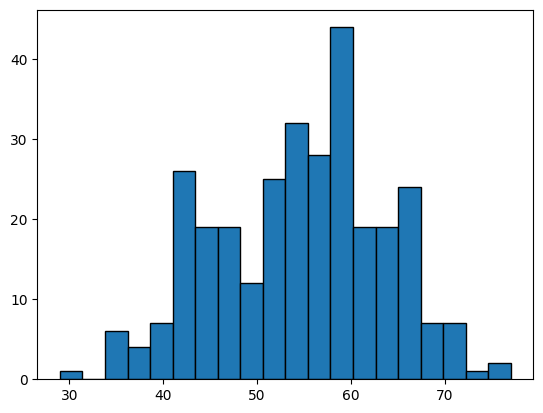

In [ ]:
# Example: Histogram for 'age'
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=20, edgecolor='black')
plt.show()


In [ ]:
# Calculate Z-scores for numerical attributes. Z-scores measure how many standard deviations a data point is from the mean. Values with high absolute Z-scores may be considered outliers.

from scipy.stats import zscore
from tabulate import tabulate
outliers_data = []
check=['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']
for i in check:
    z_scores = zscore(df[i])
    outliers = df[i][(z_scores > 3) | (z_scores < -3)].tolist()
    outliers_data.append({'Attribute': i, 'Outliers': outliers})

# Print the outliers in a table
print(tabulate(outliers_data, headers="keys", tablefmt="pretty"))





+-----------+----------------------+
| Attribute |       Outliers       |
+-----------+----------------------+
|    age    |          []          |
|    sex    |          []          |
|    cp     |          []          |
| trestbps  |      [192, 200]      |
|   chol    | [417, 564, 409, 407] |
|    fbs    |          []          |
|  restecg  |          []          |
|  thalach  |         [71]         |
|   exang   |          []          |
|  oldpeak  |      [5.6, 6.2]      |
|   slope   |          []          |
|    ca     |     [4, 4, 4, 4]     |
|   thal    |        [0, 0]        |
|  target   |          []          |
+-----------+----------------------+


In [ ]:
# removing those out liners

# Create a mask to identify outliers
outlier_mask = pd.Series(False, index=df.index)

for i in check:
    z_scores = zscore(df[i])
    outliers = (z_scores > 3) | (z_scores < -3)
    outlier_mask = outlier_mask | outliers

# Remove rows with outliers
df1 = df[~outlier_mask]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
display(df1)

DataFrame without outliers:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Categorical Encoding :

There's no categorical value in the data set. So that Categorical encoding is not needed

Check imbalance :

In [ ]:
df1['target'].value_counts()

1    158
0    129
Name: target, dtype: int64

It's not an imbalance dataset, so that wwe don't need to apply any kind of tecnique to prefent from data imbalance.

# Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

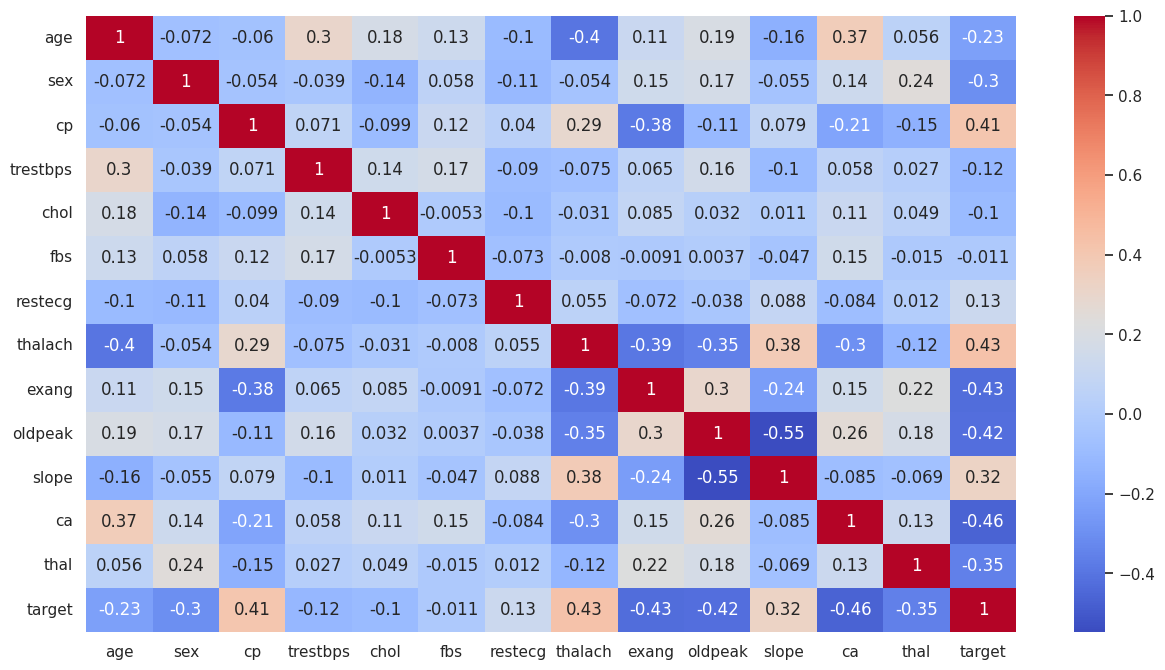

In [ ]:
# Correlation matrix
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

* There is a strong negetive co-relation between maximum heart rate and age.

* A positive co-relation can be seen between number of major vessels and age.

* Targeted patients have positive co-relation wwith the type of chest pain.

* There is a strong negetive co-relation between slope and oldpeak.

1    158
0    129
Name: target, dtype: int64


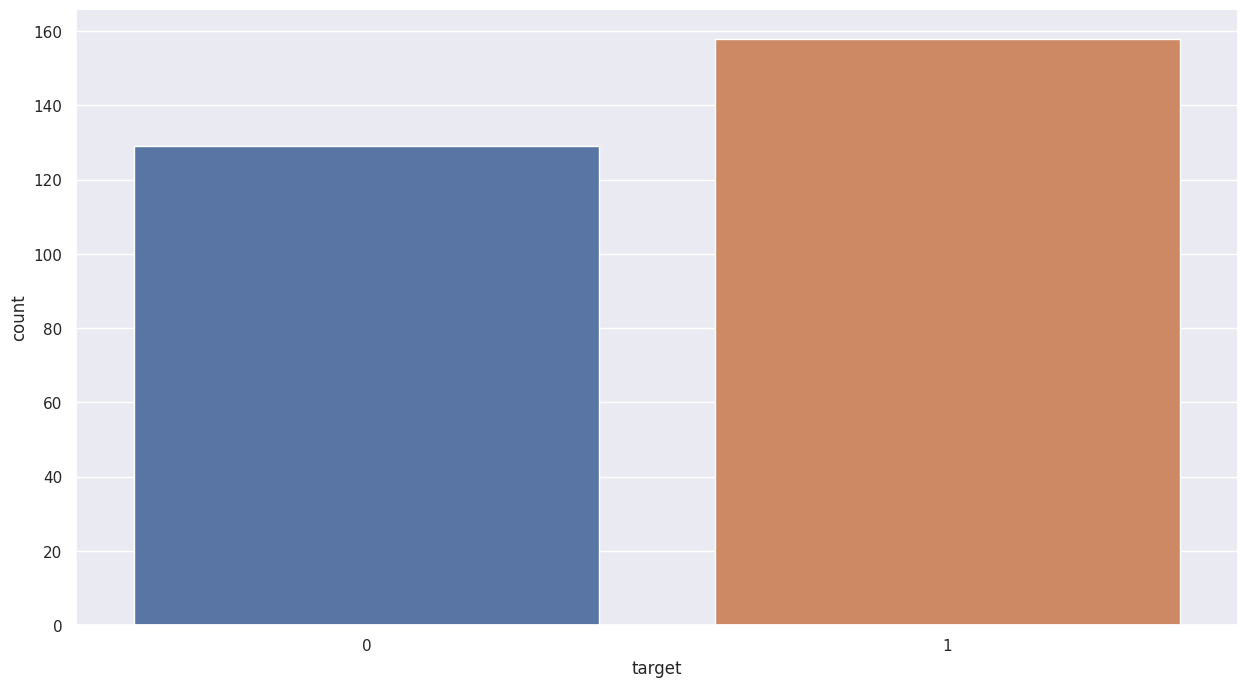

In [ ]:
# Distribution of the target variable
sns.countplot(x='target', data=df1)
target_temp=df1.target.value_counts()
print(target_temp)
plt.show()


In [ ]:
print(f"Percentage of patience without heart problem: {str(round(target_temp[0]*100/287,2))} %")
print(f"Percentage of patience with heart problem: {str(round(target_temp[1]*100/287,2))} %")

Percentage of patience without heart problem: 44.95 %
Percentage of patience with heart problem: 55.05 %


In [ ]:
# Count the total number of females and males with target=1 (yes)
female_yes_count = len(df1[(df1['sex'] == 0) & (df1['target'] == 1)])
male_yes_count = len(df1[(df1['sex'] == 1) & (df1['target'] == 1)])

# Count the total number of females and males with target=0 (no)
female_no_count = len(df1[(df1['sex'] == 0) & (df1['target'] == 0)])
male_no_count = len(df1[(df1['sex'] == 1) & (df1['target'] == 0)])

# Print the counts
print(f"Total Females with target=1: {female_yes_count}")
print(f"Total Males with target=1: {male_yes_count}")
print(f"Total Females with target=0: {female_no_count}")
print(f"Total Males with target=0: {male_no_count}")


Total Females with target=1: 69
Total Males with target=1: 89
Total Females with target=0: 20
Total Males with target=0: 109


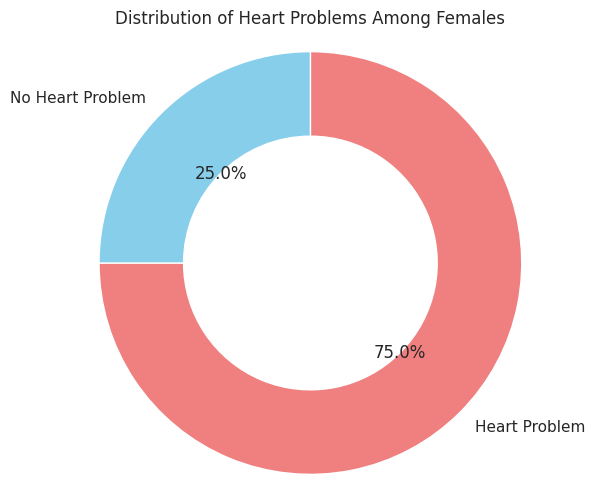

In [ ]:
# Count the number of females with heart problem and no heart problem
female_yes_count = len(df[(df['sex'] == 0) & (df['target'] == 1)])
female_no_count = len(df[(df['sex'] == 0) & (df['target'] == 0)])

# Create a pie chart
labels = ['Heart Problem', 'No Heart Problem']
sizes = [female_yes_count, female_no_count]
colors = ['lightcoral', 'skyblue']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title('Distribution of Heart Problems Among Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* 75% females have the heart problem.

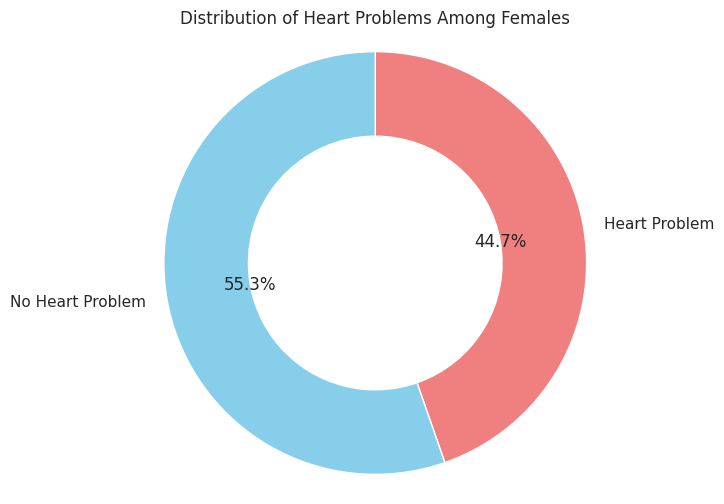

In [ ]:
# Count the number of males with heart problem and no heart problem
male_yes_count = len(df[(df['sex'] == 1) & (df['target'] == 1)])
male_no_count = len(df[(df['sex'] == 1) & (df['target'] == 0)])

# Create a pie chart
labels = ['Heart Problem', 'No Heart Problem']
sizes = [male_yes_count, male_no_count]
colors = ['lightcoral', 'skyblue']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title('Distribution of Heart Problems Among Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* 45% males have the heart problem

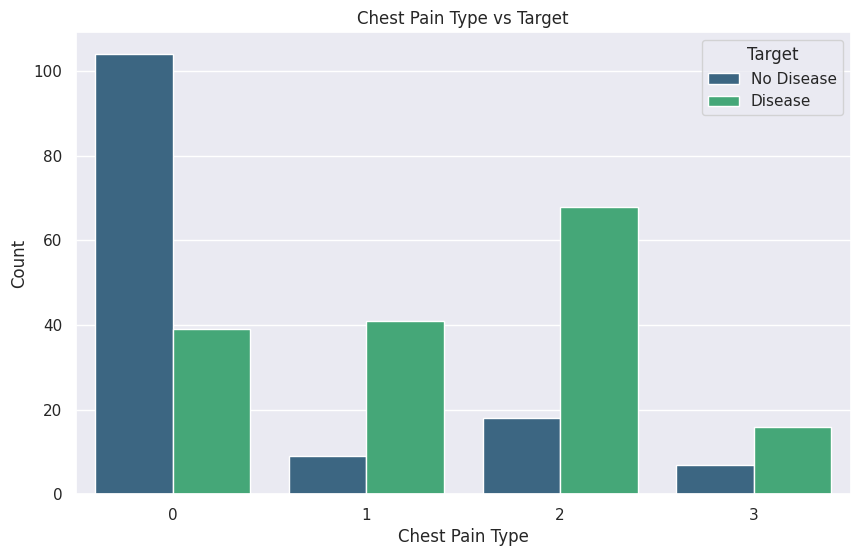

In [ ]:
# chest pain type depending on target
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


* typical angina : Majority of people without disease
* atypical angina : Majority of people with disease  
* non-anginal pain : Majority of people with disease
* asymptomatic : Very few experience this pain



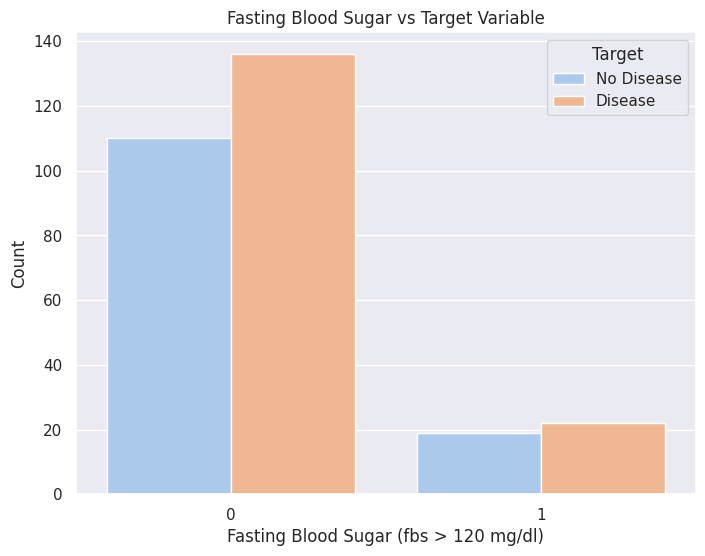

In [ ]:
# Fasting Blood Sugar (fbs) vs Target:
# Create a countplot for fbs vs target
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='target', data=df1, palette='pastel')
plt.title('Fasting Blood Sugar vs Target Variable')
plt.xlabel('Fasting Blood Sugar (fbs > 120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


* For majority of the people, Fasting blood suger is less than 120 mg/dl

In [ ]:
# Analysing the 'thal' feature

df1["thal"].unique()

array([3, 2, 1])

<ipython-input-78-48e36eedb2d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["thal"])


<Axes: xlabel='thal', ylabel='Density'>

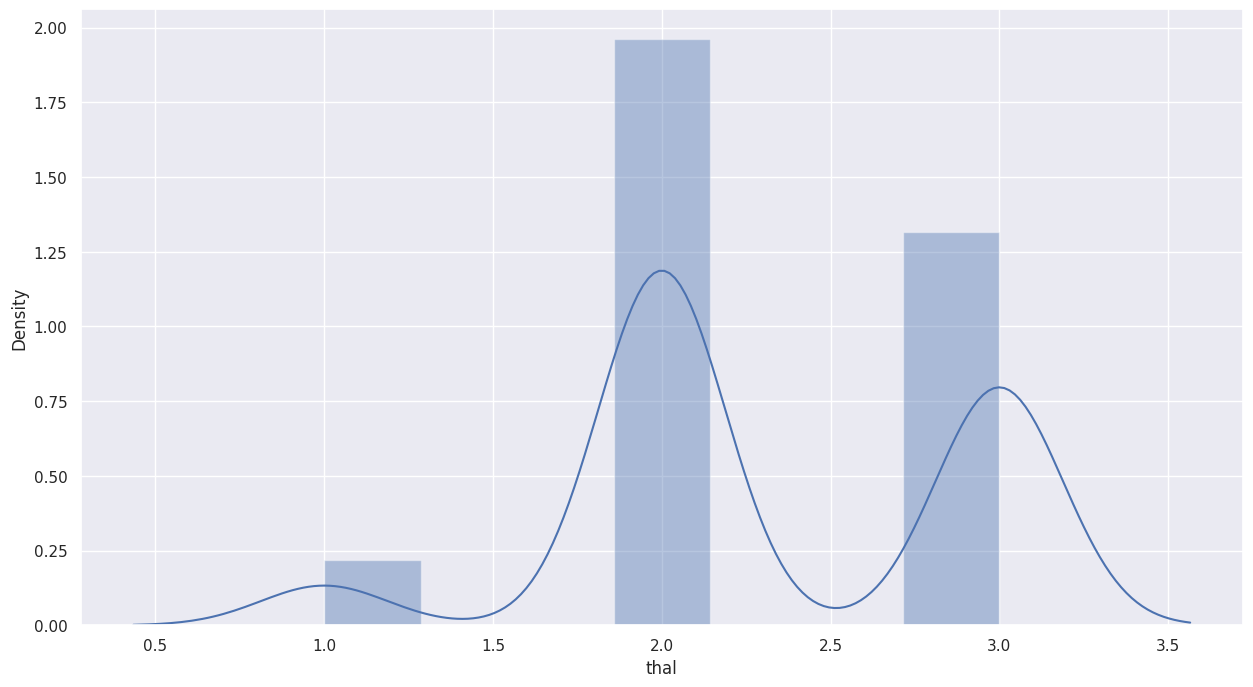

In [ ]:
sns.distplot(df1["thal"])

* Number 2 feature of 'thal' is the highest among population

In [ ]:
# Analysing the 'chol' vs Sex
df1.groupby('sex')['chol'].mean()

sex
0    254.157303
1    240.161616
Name: chol, dtype: float64

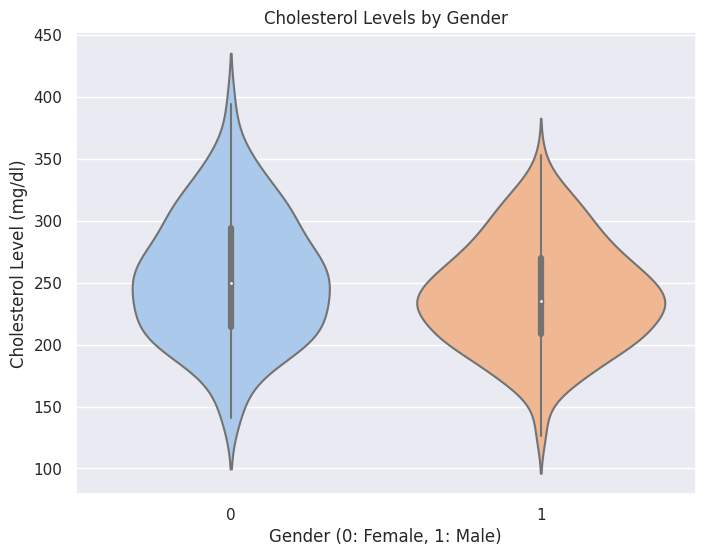

In [ ]:


plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='chol', data=df1, palette='pastel')
plt.title('Cholesterol Levels by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Cholesterol Level (mg/dl)')
plt.show()

* On a average the cholestrol level among females are higher than males.

* average cholestrol level among males are 240, while for females it's 254.

# Conclusion:

1. Strong Negative Correlation between Maximum Heart Rate and Age:

* Older individuals tend to have a lower maximum heart rate.
This is a common observation as age increases; the maximum heart rate generally decreases.

2. Positive Correlation between Number of Major Vessels and Age:

* As age increases, the number of major vessels tends to increase.
This might suggest that older individuals are more likely to have multiple major vessels affected.

3. Positive Correlation between Target and Chest Pain Type:

* Patients with a higher chest pain type (possibly indicating more severe pain) are more likely to have heart problems.
This aligns with the expectation that more severe chest pain is associated with a higher likelihood of heart disease.

4. Strong Negative Correlation between Slope and Oldpeak:

* As the slope of the peak exercise ST segment decreases, the oldpeak (ST depression induced by exercise) tends to increase.
This negative correlation could indicate that a more gradual slope is associated with higher ST depression.

5. Percentage of Patients without Heart Problems and with Heart Problems:

* About 44.95% of patients do not have heart problems.
* About 55.05% of patients have heart problems.

6. Gender and Heart Problems:

* 75% of females in the dataset have heart problems.
* 45% of males in the dataset have heart problems.
* This suggests that females in the dataset are more likely to have heart problems compared to males.

7. Chest Pain Types and Disease Presence:

* Typical angina is predominantly associated with individuals without heart disease.
* Atypical angina, non-anginal pain, and asymptomatic chest pain types are predominantly associated with individuals having heart disease.

8. Fasting Blood Sugar and Cholesterol Observations:

* For the majority of people, fasting blood sugar is less than 120 mg/dl.
On average, cholesterol levels are higher in females than in males.
* The average cholesterol level among males is 240, while for females, it's 254.

# Model Selection, Training & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df1.drop("target",axis=1)
y=df1["target"]

In [ ]:
# Assuming X and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

regression model:

In [ ]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy_rg = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_rg,2)*100)


Accuracy: 90.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree model:

In [ ]:
# Initialize Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_dt,3)*100)

Accuracy: 74.1


K Nearest Neighbors:

In [ ]:
# Initialize K Nearest Neighbors
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_knn,3)*100)

Accuracy: 65.5


Random Forest:

In [ ]:
# Standardize the data (optional, but often recommended)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
n_components = 5  # Choose the number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize K Nearest Neighbors
model = KNeighborsClassifier()

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_rf, 3)*100)

Accuracy: 81.0


Support Vector Machine:

In [ ]:
# Initialize SVC
model = svm.SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_svm,3)*100)

Accuracy: 87.9


Output of the final:

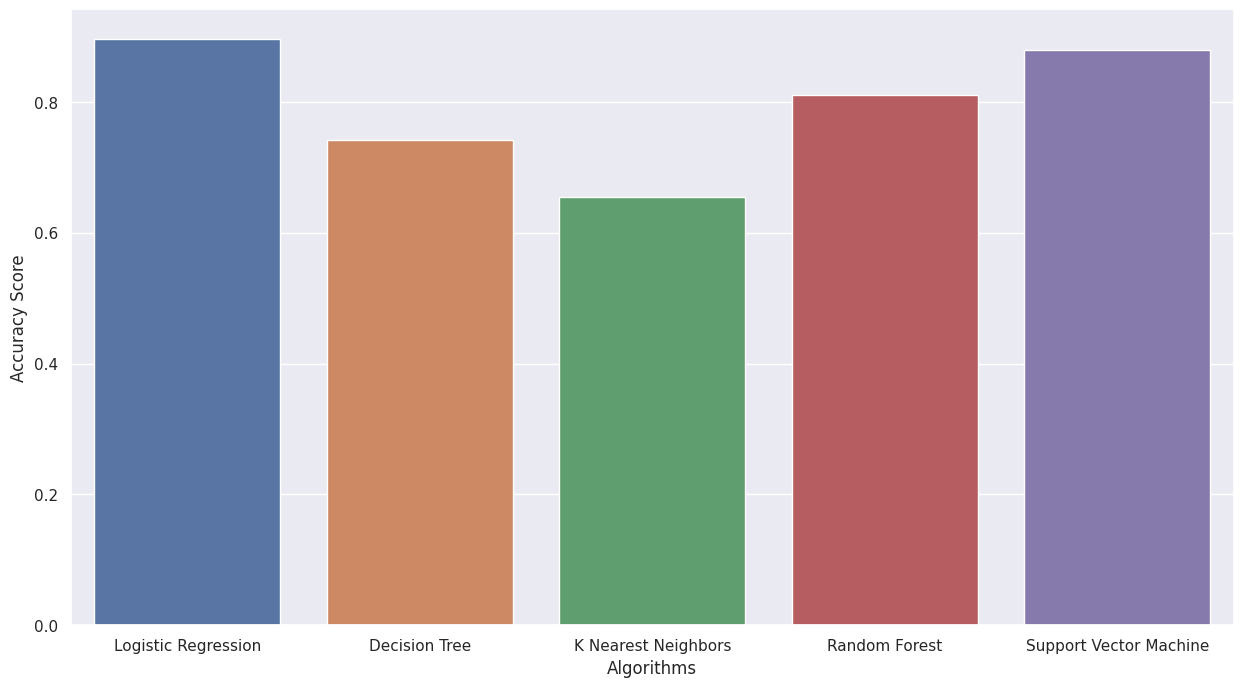

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = [accuracy_rg, accuracy_dt, accuracy_knn, accuracy_rf, accuracy_svm]  # Replace with actual accuracy scores
algorithms = ["Logistic Regression", "Decision Tree", "K Nearest Neighbors", "Random Forest", "Support Vector Machine"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(x=algorithms, y=scores)
plt.show()


**Logistic regression has good result comparing other methods**